In [1]:
using OPFRecourse, Gurobi, Distributions, Plots

In [2]:
data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_case300_ieee.m")
ref = OPFRecourse.NetworkReference(data_file, σscaling=0.03)
m = OPFRecourse.SingleScenarioOPF(ref, Gurobi.GurobiSolver(OutputFlag=0));

In [3]:
srand(1234)
scenarios = OPFRecourse.OPFScenarios(ref, nsamples = 10_000);

Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:06



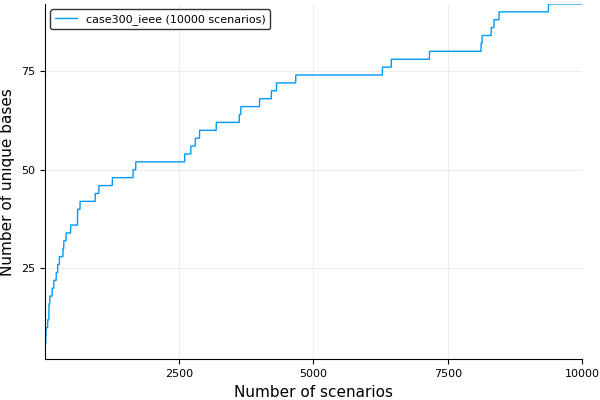

In [4]:
plot(
    [length(unique(scenarios.whichbasis[1:i,:],1)) for i in 1:size(scenarios.scenarios,1)],
    ylabel="Number of unique bases",
    xlabel="Number of scenarios",
    label="case300_ieee (10000 scenarios)"
)

In [5]:
function scenario_p(scenarios, i)
    uniquescenarios = unique(scenarios.whichbasis[1:i,:],1)
    [length(scenarios.whichscenario[(uniquescenarios[b,1],uniquescenarios[b,2])]) for b in 1:size(uniquescenarios,1)]
end

scenario_p (generic function with 1 method)


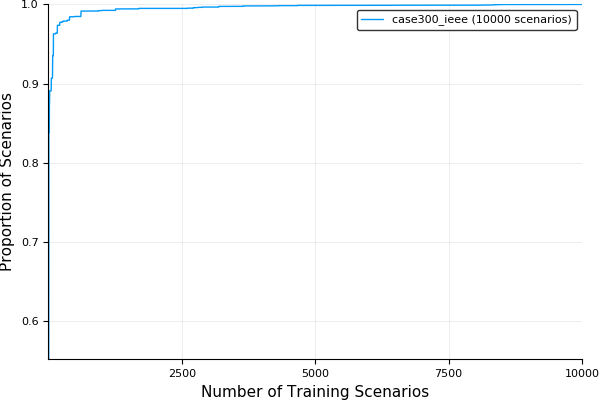

In [6]:
plot(
    [sum(scenario_p(scenarios, i)) for i in 1:size(scenarios.scenarios,1)] ./ size(scenarios.scenarios,1),
    ylabel="Proportion of Scenarios",
    xlabel="Number of Training Scenarios",
    label="case300_ieee (10000 scenarios)"
)


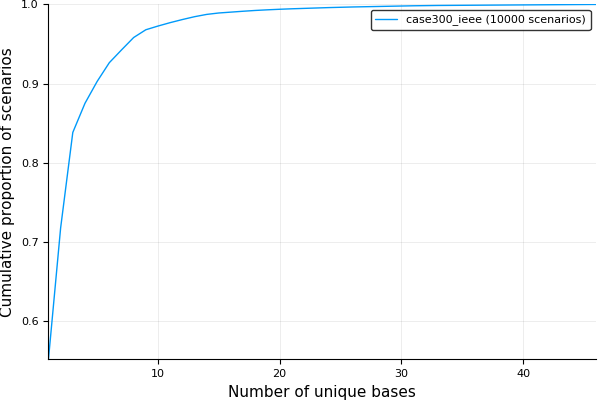

In [7]:
basiscounts = sort!(map(length, values(scenarios.whichscenario)), rev=true)

plot(
    cumsum(basiscounts) / sum(basiscounts),
    xlabel="Number of unique bases",
    ylabel="Cumulative proportion of scenarios",
    label="case300_ieee (10000 scenarios)"
)